# Latihan Praktek IF-IDF

### Analisis Perbandingan Wilayah Berdasarkan Frekuensi dan Pembobotan Istilah (TF-IDF) dari Data Kebahagiaan Global 2021

#### NIM: A11.2023.15194
#### NAMA: RESTU ARDIANSYAH
#### KELOMPOK: A11.4406
#### MATA KULIAH: PEMBELAJARAN MESIN

In [38]:
import numpy as np
import pandas as pd

In [39]:
dataset = pd.read_csv('world-happiness-report-2021.csv',sep=';')

In [40]:
dataset_country = dataset['Regional indicator'].astype(str)

In [41]:
dataset_country

0          Western Europe
1          Western Europe
2          Western Europe
3          Western Europe
4          Western Europe
              ...        
144    Sub-Saharan Africa
145    Sub-Saharan Africa
146    Sub-Saharan Africa
147    Sub-Saharan Africa
148            South Asia
Name: Regional indicator, Length: 149, dtype: object

In [42]:
dataset.shape

(149, 20)

In [43]:
dataset

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


In [44]:
dataset_label = dataset['Ladder score']
dataset_label

0      7.842
1      7.620
2      7.571
3      7.554
4      7.464
       ...  
144    3.512
145    3.467
146    3.415
147    3.145
148    2.523
Name: Ladder score, Length: 149, dtype: float64

# Cek Distribusi label

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Visualisasi the target variable

C:\Users\RESTU ARDIANSYAH\AppData\Local\Temp\ipykernel_5296\1470841120.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')


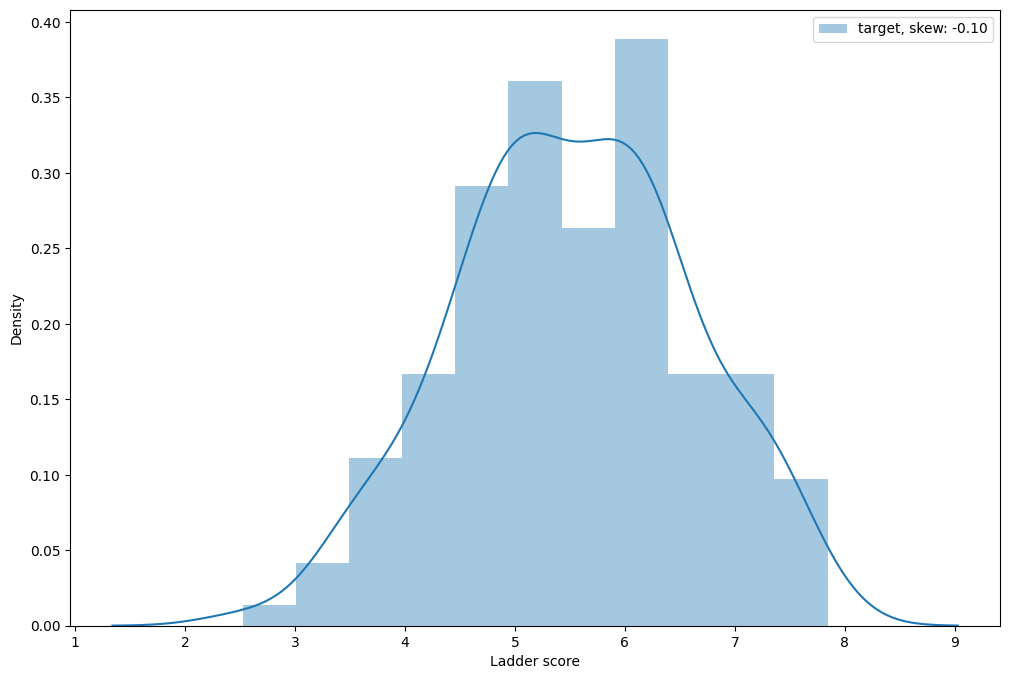

In [46]:
# Visualizing the target variable
plt.figure(figsize=(12,8))
sns.distplot(dataset_label, label=f'target, skew: {dataset_label.skew():.2f}')
plt.legend(loc='best')
plt.show()

In [47]:
dataset_label.value_counts()

Ladder score
5.477    2
5.929    2
7.842    1
7.554    1
7.464    1
        ..
3.512    1
3.467    1
3.415    1
3.145    1
2.523    1
Name: count, Length: 147, dtype: int64

# TF-IDF

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [49]:
vectorizer = TfidfVectorizer()

In [50]:
X = vectorizer.fit_transform(dataset_country)

In [51]:
print(X.shape)

(149, 22)


In [52]:
features = vectorizer.get_feature_names_out()

In [53]:
features

array(['africa', 'america', 'and', 'anz', 'asia', 'caribbean', 'central',
       'commonwealth', 'east', 'eastern', 'europe', 'independent',
       'latin', 'middle', 'north', 'of', 'saharan', 'south', 'southeast',
       'states', 'sub', 'western'], dtype=object)

In [54]:
idfValues = vectorizer.idf_

In [55]:
d = dict(zip(features, 9 - idfValues))

In [56]:
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)

In [57]:
for i in range(22):
    print(sortedDict[i])

('and', np.float64(7.066902149809463))
('africa', np.float64(6.978348752468019))
('europe', np.float64(6.652926352033391))
('saharan', np.float64(6.600282618547968))
('sub', np.float64(6.600282618547968))
('america', np.float64(6.2082405307719455))
('east', np.float64(6.16741853625169))
('asia', np.float64(6.124858921832894))
('north', np.float64(6.0804071592620605))
('western', np.float64(6.0804071592620605))
('caribbean', np.float64(6.033887143627167))
('latin', np.float64(6.033887143627167))
('central', np.float64(5.879736463799909))
('eastern', np.float64(5.879736463799909))
('middle', np.float64(5.879736463799909))
('commonwealth', np.float64(5.554314063365281))
('independent', np.float64(5.554314063365281))
('of', np.float64(5.554314063365281))
('states', np.float64(5.554314063365281))
('southeast', np.float64(5.2919497988977895))
('south', np.float64(5.068806247583581))
('anz', np.float64(4.598802618337844))


In [58]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

In [59]:
def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

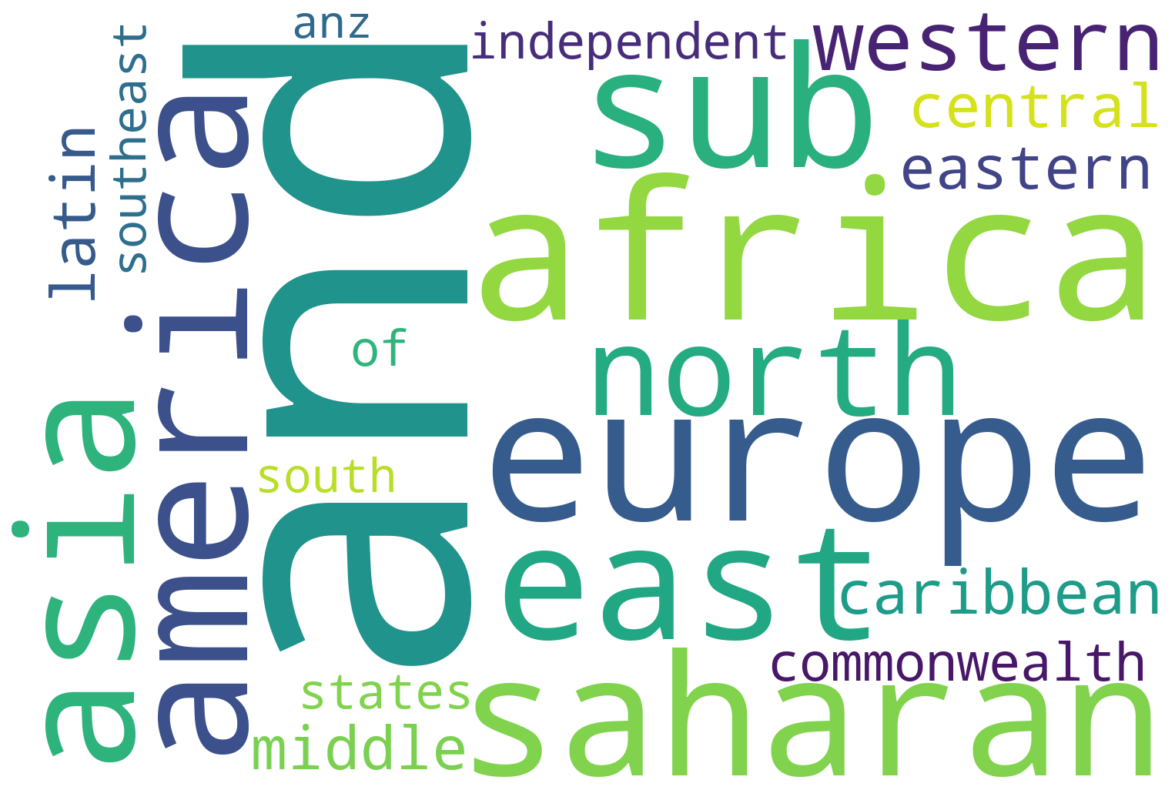

In [60]:
PlotWordCloud(d)

### __________________________________________________________________________________________________________________________
# EKSPERIMEN

## Membandingkan BOW vs TF-IDF pada Kolom "Regional indicator" 

### Tujuannya untuk melihat kata (region) apa saja yang paling sering muncul dan bagaimana bobotnya berubah setelah dihitung dengan TF-IDF.

In [61]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

##### Mengambil data dari kolom Regional indicator

In [62]:
dataset_judul_region = dataset['Regional indicator'].astype(str)

##### Mengubah isi kolom menjadi list

In [66]:
region_to_list = dataset_judul_region.tolist()

#### BOW

In [67]:
bow_vectorizer = CountVectorizer()
bow_matrix = bow_vectorizer.fit_transform(region_sentences)
bow_df = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())
bow_sum = bow_df.sum().sort_values(ascending=False)


#### TF-IDF

In [68]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(region_sentences)
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
tfidf_mean = tfidf_df.mean().sort_values(ascending=False)


##### Menampilkan hasil dari BOW

In [69]:
print("Kata 10 Teratas dengan BOW:")
print(bow_sum.head(10))

Kata 10 Teratas dengan BOW:
and        58
africa     53
europe     38
saharan    36
sub        36
america    24
east       23
asia       22
north      21
western    21
dtype: int64


##### Menampilkan hasil dari TF-IDF

In [70]:
print("Kata 10 Teratas dengan TF-IDF:")
print(tfidf_mean.head(10))

Kata 10 Teratas dengan TF-IDF:
africa       0.163147
sub          0.146775
saharan      0.146775
europe       0.138276
and          0.135266
western      0.109846
asia         0.093432
east         0.083599
america      0.081371
caribbean    0.073771
dtype: float64
